# 1. Import the tweet data of Sainsburys

In [85]:
!pip install emoji

In [86]:
import pandas as pd
import warnings
import json
from matplotlib import pyplot as plt
import re
import ast
import itertools

warnings.filterwarnings('ignore')

In [87]:
sains_df = pd.read_json('./sainsburys.json')

In [88]:
sains_df.head()

created_at                   id               id_str  \
0 2020-12-02 21:25:42  1334247396054798336  1334247396054798336   
1 2020-03-25 08:55:11  1242736777103839237  1242736777103839237   
2 2020-03-15 18:07:30  1239251894293409797  1239251894293409797   
3 2020-10-18 10:43:27  1317778311729369088  1317778311729369088   
4 2020-11-07 20:52:20  1325179302384717824  1325179302384717824   

                                                                                                                                                         text  \
0                 RT @felixprojectuk: Today we collected some food donated by shoppers at a branch of @sainsburys in Alperton and we were so touched to find…   
1                @ocado @tesco @sainsburys @asda @waitrose @Morrisons It is time you all worked together to get a list of vulnerable… https://t.co/tfYo0Vbk3F   
2  RT @Danwhite1972: Dear panic buyers\n\nPlease use what humanity you have left &amp; leave my family &amp; countless millions of disabled adults &amp; chi…   
3                                                                             @daisy_haggard @sainsburys Can’t wait to see what @sainsburys brings me today 🙈   
4                @lordrix @sainsburys But Sainsbury's have made a 'Big' thing on their website that they will do all they can to hel… https://t.co/veqzpTbpml   

  display_text_range  \
0               None   
1               None   
2               None   
3           [27, 79]   
4          [21, 140]   

                                                                                 source  \
0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>   
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   

   truncated  in_reply_to_status_id  in_reply_to_status_id_str  \
0      False                    NaN                        NaN   
1       True                    NaN                        NaN   
2      False                    NaN                        NaN   
3      False           1.317512e+18               1.317512e+18   
4       True           1.325169e+18               1.325169e+18   

   in_reply_to_user_id  ...   matching_rules  \
0                  NaN  ...  [{'tag': None}]   
1         2.015550e+07  ...  [{'tag': None}]   
2                  NaN  ...  [{'tag': None}]   
3         2.875019e+09  ...  [{'tag': None}]   
4         5.496380e+07  ...  [{'tag': None}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [89]:
sains_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'matching_rules', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'extended_tweet', 'possibly_sensitive',
       'extended_entities', 'scopes'],
      dtype='object')

In [90]:
summary_sains = sains_df[['retweet_count', 'reply_count', 'favorite_count', 'quote_count']]

In [91]:
summary_sains.describe()

retweet_count   reply_count  favorite_count   quote_count
count   82821.000000  82821.000000    82821.000000  82821.000000
mean        0.322442      0.471100        2.615339      0.045230
std        17.028065      7.626277      130.707210      1.913578
min         0.000000      0.000000        0.000000      0.000000
25%         0.000000      0.000000        0.000000      0.000000
50%         0.000000      0.000000        0.000000      0.000000
75%         0.000000      1.000000        1.000000      0.000000
max      3274.000000   1655.000000    31420.000000    334.000000

In [92]:
tesco_df = pd.read_json('./tesco.json')

In [93]:
summary_tesco = tesco_df[['retweet_count', 'reply_count', 'favorite_count', 'quote_count']]

summary_tesco.describe()

retweet_count   reply_count  favorite_count   quote_count
count   96702.000000  96702.000000    96702.000000  96702.000000
mean        0.256954      0.411501        1.630277      0.038707
std        10.838895      5.681085       54.839342      2.082943
min         0.000000      0.000000        0.000000      0.000000
25%         0.000000      0.000000        0.000000      0.000000
50%         0.000000      0.000000        0.000000      0.000000
75%         0.000000      1.000000        1.000000      0.000000
max      2715.000000   1371.000000    12489.000000    562.000000

In [94]:
waitrose_df = pd.read_json('./waitrose.json')

In [95]:
summary_waitrose = waitrose_df[['retweet_count', 'reply_count', 'favorite_count', 'quote_count']]

summary_waitrose.describe()

retweet_count   reply_count  favorite_count   quote_count
count   24802.000000  24802.000000    24802.000000  24802.000000
mean        0.345617      0.375091        2.191114      0.057012
std         9.277134      4.713499       55.406084      2.185681
min         0.000000      0.000000        0.000000      0.000000
25%         0.000000      0.000000        0.000000      0.000000
50%         0.000000      0.000000        0.000000      0.000000
75%         0.000000      0.000000        1.000000      0.000000
max       920.000000    600.000000     6141.000000    313.000000

In [96]:
def parse_json(value):
    if isinstance(value, dict):
        return value
    elif isinstance(value, str):
        return eval(value)
    else:
        return None

In [97]:
sains_df['parsed_user'] = sains_df['user'].apply(parse_json)

In [98]:
sains_df['name'] = [x['name'] for x in sains_df['parsed_user']]

In [99]:
# Trend Analysis
sains_df['date'] = sains_df['created_at']
pd.to_datetime(sains_df['date'])
tesco_df['date'] = tesco_df['created_at']
pd.to_datetime(tesco_df['date'])
waitrose_df['date'] = waitrose_df['created_at']
pd.to_datetime(waitrose_df['date'])

0       2020-07-29 10:28:58
1       2020-11-17 16:31:19
2       2020-02-28 20:19:01
3       2020-11-13 09:21:04
4       2020-06-04 20:54:01
                ...        
24797   2020-10-13 18:44:35
24798   2020-02-09 10:12:11
24799   2020-03-24 08:36:49
24800   2020-07-01 16:10:30
24801   2020-12-13 19:23:04
Name: date, Length: 24802, dtype: datetime64[ns]

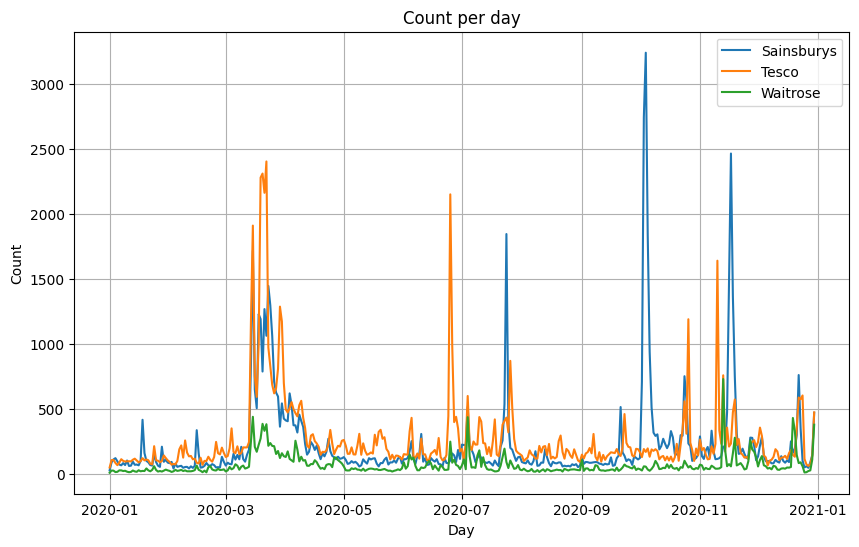

In [100]:
daily_counts_sains = sains_df.groupby(pd.Grouper(key='date', freq='D'))['id'].count()
daily_counts_tesco = tesco_df.groupby(pd.Grouper(key='date', freq='D'))['id'].count()
daily_counts_waitrose = waitrose_df.groupby(pd.Grouper(key='date', freq='D'))['id'].count()

plt.figure(figsize=(10, 6))
plt.plot(daily_counts_sains.index, daily_counts_sains.values, marker=None, linestyle='-', label='Sainsburys')
plt.plot(daily_counts_tesco.index, daily_counts_tesco.values, marker=None, linestyle='-', label='Tesco')
plt.plot(daily_counts_waitrose.index, daily_counts_waitrose.values, marker=None, linestyle='-', label='Waitrose')
plt.title('Count per day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

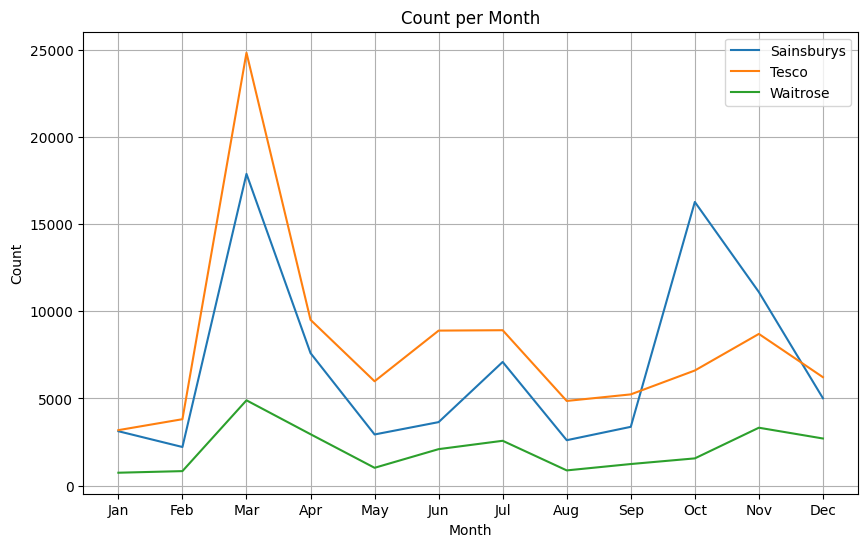

In [101]:
monthly_counts_sains = sains_df.groupby(pd.Grouper(key='date', freq='M'))['id'].count()
monthly_counts_tesco = tesco_df.groupby(pd.Grouper(key='date', freq='M'))['id'].count()
monthly_counts_waitrose = waitrose_df.groupby(pd.Grouper(key='date', freq='M'))['id'].count()

x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
plt.plot(x_labels, monthly_counts_sains.values, marker=None, linestyle='-', label='Sainsburys')
plt.plot(x_labels, monthly_counts_tesco.values, marker=None, linestyle='-', label='Tesco')
plt.plot(x_labels, monthly_counts_waitrose.values, marker=None, linestyle='-', label='Waitrose')
plt.title('Count per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

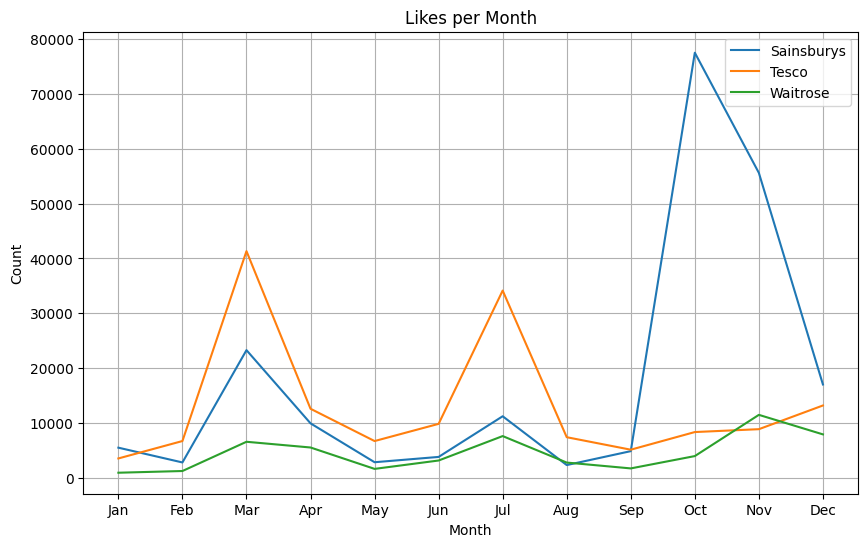

In [102]:
monthly_counts_sains = sains_df.groupby(pd.Grouper(key='date', freq='M'))['favorite_count'].sum()
monthly_counts_tesco = tesco_df.groupby(pd.Grouper(key='date', freq='M'))['favorite_count'].sum()
monthly_counts_waitrose = waitrose_df.groupby(pd.Grouper(key='date', freq='M'))['favorite_count'].sum()

x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
plt.plot(x_labels, monthly_counts_sains.values, marker=None, linestyle='-', label='Sainsburys')
plt.plot(x_labels, monthly_counts_tesco.values, marker=None, linestyle='-', label='Tesco')
plt.plot(x_labels, monthly_counts_waitrose.values, marker=None, linestyle='-', label='Waitrose')
plt.title('Likes per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
# Choosing the period of October to December due to higher average tweet counts and likes. Also it falls during the busy season of holidays. 
## Thanksgiving, Black Friday, Halloween, Christmas

In [104]:
sains_df_final = sains_df[sains_df['date'].dt.month.between(10,12)]

In [105]:
sains_df_final.shape

(32372, 40)

In [106]:
sains_df_final['user_screen_name'] = [x['screen_name'] for x in sains_df_final['parsed_user']]
sains_df_final['user_profile'] = [x['description'] for x in sains_df_final['parsed_user']]

In [107]:
active_user_df = sains_df_final.groupby(by=['user_screen_name', 'user_profile'])['id'].count().sort_values(ascending=False).reset_index().head(13)
pd.set_option('display.max_colwidth', None)
active_user_df

user_screen_name  \
0       socketman69   
1    Paul_Horses1st   
2       debbiesuth1   
3   HaynesGreyhound   
4         snicklin1   
5        beanie1503   
6        ChrisPDuck   
7     northumbrian_   
8    LattMaurillard   
9    MikkelsonsMads   
10  Usele22_Reptile   
11  333peterobinson   
12            NSPKU   

                                                                                                                                                         user_profile  \
0   Wife&2 kids Schnauzer calld Skye fundraiser Muscular (son has)Dystrophy  since 2000 Man United since1970 Testicular Cancer Survivor \nBeatles Stones Lennon Faces   
1                                          Love horse racing and real ale. In that order. I never pay for tips.\nPlenty of free tips out there.\nAll opinions my own.   
2                                             to the right side of life. bullies/abusers won’t be tolerated. manners & decency at all times please. #womenwontweesht.   
3               Beautiful country pub in Bedfordshire serving a great selection of drinks and pub grub. Regular entertainment together with darts and petanque teams.   
4    Animal lover, owned by a cat, Jeoffrey and  dog, Nora.  Brexiteer.( Anti EU & Pro Europe) very concerned for the plight of Afghanistan people & I support Israel   
5                                                 Honesty/Integrity/Kindness/Loyalty. Team Dylan/Mann & Broderick. Black dog & PTSD. Retired PC. I ❤ Gibraltar. SSTID   
6                                                                                       Freelancer, All views are my own and not representative of any place of work.   
7         Politically - Voted Labour 3 times, Tory 5 times.   Does that make me centrist or centre right? You decide. \n\nLove the outdoor life. Love Northumberland.   
8          A guy with a history degree, doing some education online\nI write and I read\nIf you're going to argue with me, act in good faith or I won't be interested   
9                                                                                                                             Never give an Oni a Kanabo. \nIkko-Ikki   
10                                     Hi I draw sometimes! 💕@Jekkilu💕\n♊ (For Homestuck reasons), \nInstagram: the same as here👌 Only DM if you know me irl, sorry 😅   
11                                                                                                       Heavy in or on depending. Own opinions. Cheshire Gods County   
12                                   The NSPKU exists to help and support people with PKU, their families and carers. It was formed in 1973, see http://www.nspku.org   

    id  
0   51  
1   34  
2   28  
3   28  
4   20  
5   19  
6   19  
7   18  
8   16  
9   16  
10  16  
11  16  
12  16

In [108]:
sains_df_final['user_geo'] = [x['location'] for x in sains_df_final['parsed_user']]
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('London', 'London, England')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('london', 'London, England')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('London, UK', 'London, England')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('United Kingdom' , 'England, United Kingdom')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('UK' , 'England, United Kingdom')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('Scotland' , 'Scotland, United Kingdom')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('Glasgow' , 'Scotland, United Kingdom')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('Glasgow, Scotland' , 'Scotland, United Kingdom')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('England' , 'England, United Kingdom')
sains_df_final['user_geo'] = sains_df_final['user_geo'].replace('Manchester' , 'Manchester, England')

user_geo_df = sains_df_final['user_geo'].dropna()
user_geo_df.groupby(by=[user_geo_df.values]).count().sort_values(ascending=False).head(10)

England, United Kingdom     2609
London, England             2474
Scotland, United Kingdom     419
Manchester, England          360
South East, England          188
North West, England          141
Birmingham, England          124
Wales, United Kingdom        106
Edinburgh, Scotland          102
West Midlands, England        99
Name: user_geo, dtype: int64

In [109]:
sains_like_analysis = sains_df_final.sort_values(by = 'favorite_count' , ascending=False)[['user_screen_name', 'extended_tweet', 'favorite_count']].reset_index().head(10)

In [110]:
sains_like_analysis.dropna(subset=['extended_tweet'], inplace=True)

In [111]:
sains_like_analysis['text'] = [parse_json(x)['full_text'] for x in sains_like_analysis['extended_tweet']]

In [112]:
sains_like_analysis = sains_like_analysis.reset_index()[['user_screen_name', 'text', 'favorite_count']]
sains_like_analysis

user_screen_name  \
0      ChrisHewitt   
1      NavyReg1970   
2     yasmin_bower   
3     ginamartinuk   
4   TitaniaMcGrath   
5           AldiUK   
6  CharlotteSantry   

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                         Dear @sainsburys — I will feel so much safer shopping in your stores now I know there’s no chance of bumping into Laurence Fox. Thank you. Yours, a loyal customer https://t.co/Y4OdFKrTew   
1                                                                                                                                   dear @sainsburys if you are worried about running short of EU Broccoli and Cauliflower just pop over to Lincolnshire - we are ploughing it back in due to having too much of it.   
2                                                                                                  @sainsburys People complaining they can’t “relate” to this advert as it doesn’t “represent” them, yet felt perfectly represented when these guys were on our TVs.... make it make sense 🤣 https://t.co/PRccEM62j8   
3                                            @sainsburys All of you writing negative comments on this do realise you're just outing yourself at massive racists right? You're saying that the existence of a black family makes you *so* angry that you'd boycott shopping where you've shopped forever. Disgusting.   
4  The principal shareholders of @sainsburys, the Qatari government, may have a track record of migrant exploitation and human rights abuses.\n\nBut at least their supermarkets in the UK are committed to social justice activism on Twitter. ✊🎉\n\n#Priorities #LoveWins #IStandWithQatar https://t.co/U9wW1Y9PvJ   
5                                                                                                                                               Hey @Tesco, @asda, @LidlGB, @Sainsburys, @Waitrose, @IcelandFoods @MarksAndSpencer and @Morrisons. What you doing later? Fancy coming to our #Aldi30thBirthdayParty?   
6                                                            WHY are the zips of so many school uniform dresses adorned with “cute” heart charms? Why not a book, robot, rocket...anything that doesn’t suggest to 4-11yo girls that their role at school is to look adorable? @marksandspencer @Matalan @sainsburys   

   favorite_count  
0           31420  
1           10818  
2            8679  
3            7603  
4            4065  
5            3811  
6            1614

In [113]:
sains_reply_analysis = sains_df_final[['user_screen_name','in_reply_to_screen_name']].dropna()
sains_reply_analysis.columns = ['user1', 'user2']

In [114]:
sains_reply_analysis['reply'] = 1
sains_reply_analysis = sains_reply_analysis[sains_reply_analysis['user1'] != sains_reply_analysis['user2']]

sains_reply_analysis = sains_reply_analysis.groupby(by=['user1','user2'])['reply'].sum().reset_index()
sains_reply_analysis.head(20)

user1            user2  reply
0    007Dufour007      martywilde3      1
1     00dmlewis00           AldiUK      1
2        01101001         mjdines1      1
3       0161Jimmy       emmadotcom      1
4        01SusieC       KJacko1974      1
5        03germas  GaryMor86753184      1
6   06grouchymama   SpaceriderDave      1
7       07985Bill  JohnWhitbyPBORO      1
8    0800adderley  Pearlyqueen2020      2
9    0800adderley      ThinkOnNow1      1
10   0800adderley        mitsyarty      1
11      0Huggett0       BongSagans      1
12      0Huggett0     campers_moll      1
13          0Rak5    fredchapman46      1
14        0oonthe       sainsburys      1
15     0xFBADBEEF    ReddySteadyG0      1
16     0xFBADBEEF      Simonablake      1
17     0xFBADBEEF    gabrielquotes      1
18      100Dianne     Paul16820650      2
19      100Dianne       itsAaron77      1

In [115]:
sains_reply_analysis['interaction'] = [sorted([x,y]) for x,y in zip(sains_reply_analysis['user1'],sains_reply_analysis['user2'])]
sains_reply_analysis['interaction_str'] = sains_reply_analysis['interaction'].apply(str)

sains_reply_analysis.head()

user1        user2  reply                  interaction  \
0  007Dufour007  martywilde3      1  [007Dufour007, martywilde3]   
1   00dmlewis00       AldiUK      1        [00dmlewis00, AldiUK]   
2      01101001     mjdines1      1         [01101001, mjdines1]   
3     0161Jimmy   emmadotcom      1      [0161Jimmy, emmadotcom]   
4      01SusieC   KJacko1974      1       [01SusieC, KJacko1974]   

                   interaction_str  
0  ['007Dufour007', 'martywilde3']  
1        ['00dmlewis00', 'AldiUK']  
2         ['01101001', 'mjdines1']  
3      ['0161Jimmy', 'emmadotcom']  
4       ['01SusieC', 'KJacko1974']

In [116]:
user_undnet_df = sains_reply_analysis.groupby(by=['interaction_str'])['reply'].sum().reset_index()
user_undnet_df

interaction_str  reply
0       ['007Dufour007', 'martywilde3']      1
1             ['00dmlewis00', 'AldiUK']      1
2              ['01101001', 'mjdines1']      1
3           ['0161Jimmy', 'emmadotcom']      1
4            ['01SusieC', 'KJacko1974']      1
...                                 ...    ...
16250         ['wennbley', 'y_alibhai']      1
16251     ['whitenancy007', 'z_bukake']      1
16252  ['whosthedaddyiam', 'y_alibhai']      1
16253     ['wood_steve54', 'y_alibhai']      1
16254      ['y_alibhai', 'yadevolkram']      1

[16255 rows x 2 columns]

In [117]:
user_undnet_df['user1'] = [ast.literal_eval(x)[0] for x in user_undnet_df['interaction_str']]
user_undnet_df['user2'] = [ast.literal_eval(x)[1] for x in user_undnet_df['interaction_str']]
user_undnet_df = user_undnet_df.sort_values(by='reply', ascending=False).head(5).reset_index()
user_undnet_df

index                         interaction_str  reply            user1  \
0   2576                 ['ChrisPDuck', 'Tesco']     19       ChrisPDuck   
1   5032   ['HaynesGreyhound', 'Paul_Horses1st']     17  HaynesGreyhound   
2  14899         ['lucius_vorenus', 'spendinio']     17   lucius_vorenus   
3    141  ['333peterobinson', 'HaynesGreyhound']     14  333peterobinson   
4   6975            ['LeeG15', 'plastic_doll__']     13           LeeG15   

             user2  
0            Tesco  
1   Paul_Horses1st  
2        spendinio  
3  HaynesGreyhound  
4   plastic_doll__

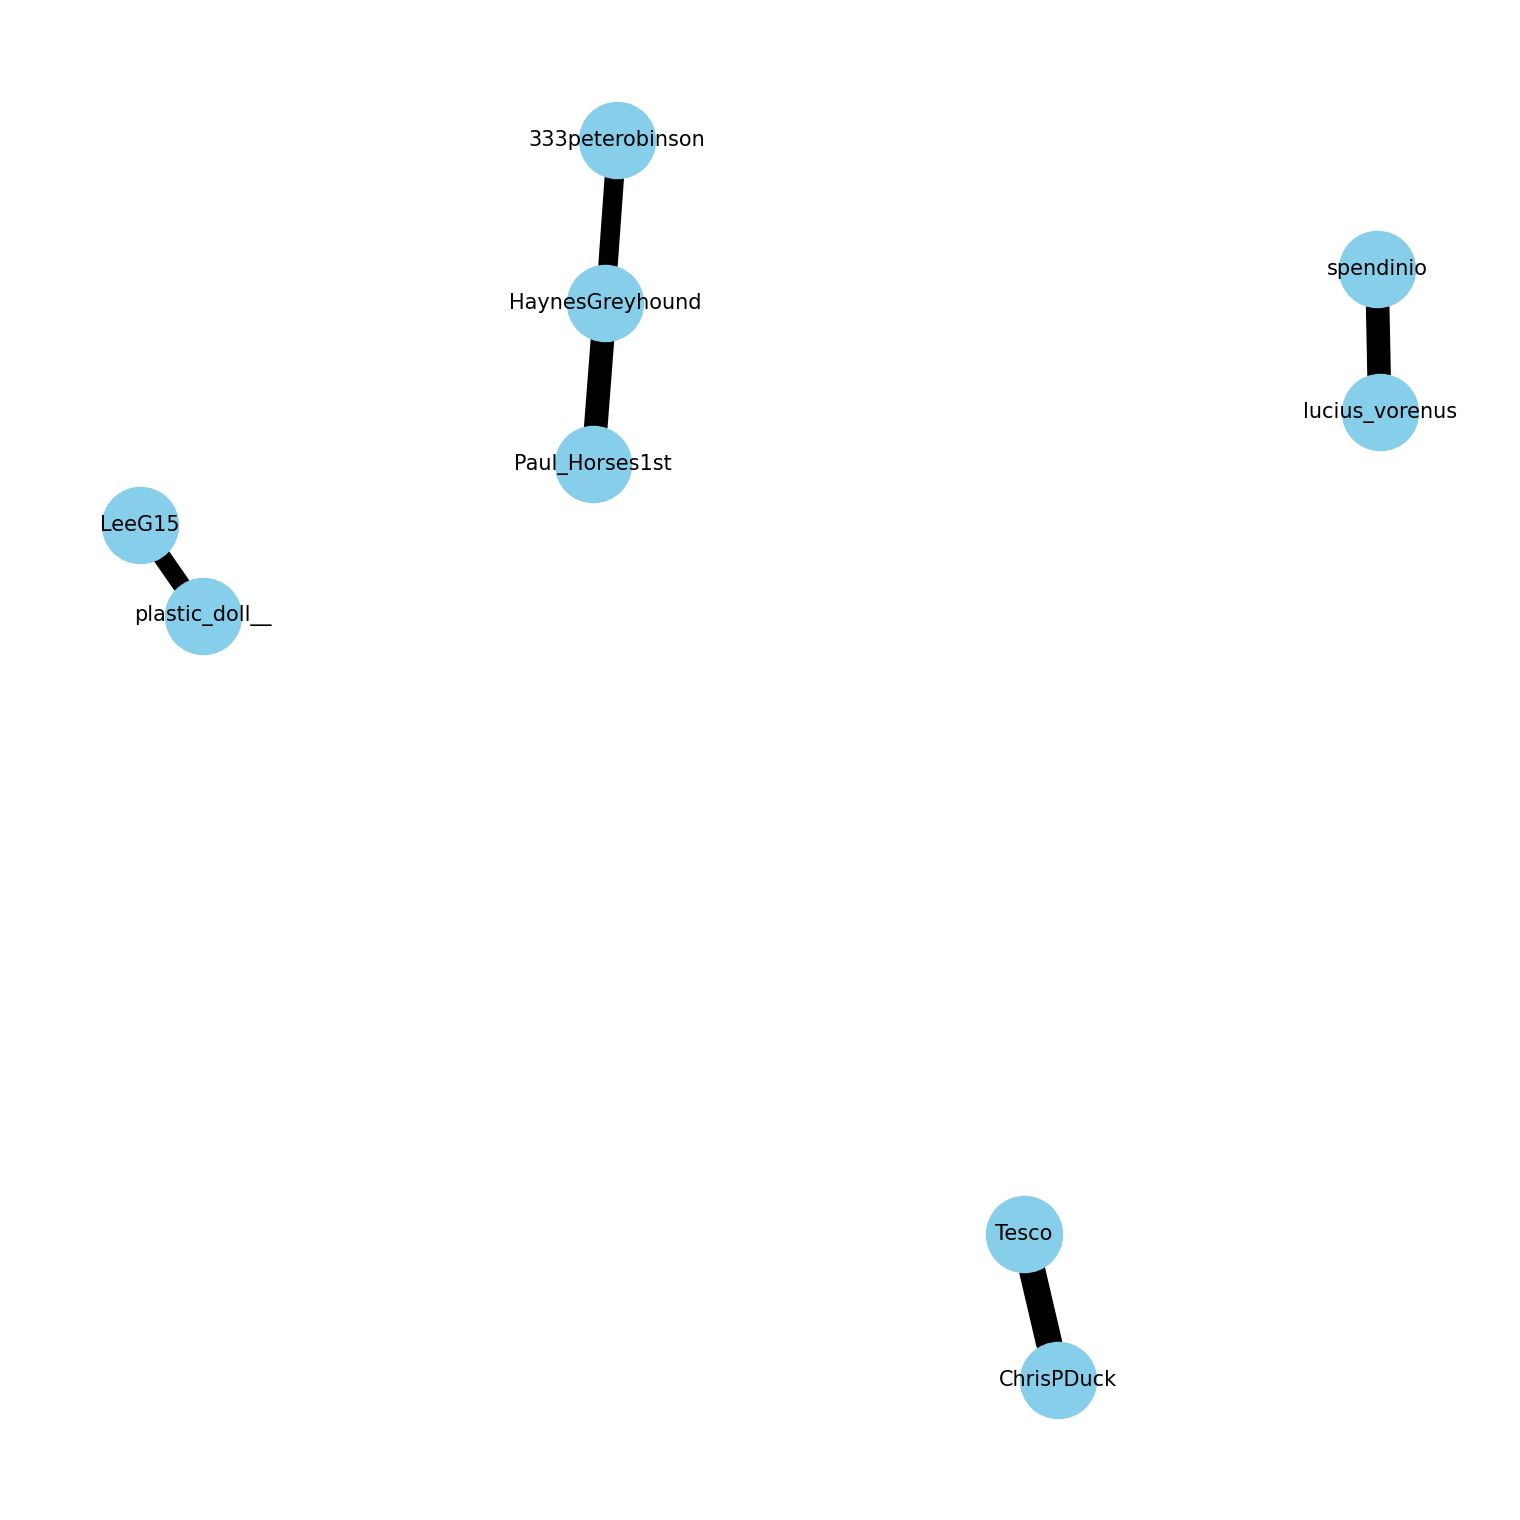

In [118]:
import networkx as nx
import matplotlib.pyplot as plt

# Set basic parameters
G_from_df = nx.from_pandas_edgelist(user_undnet_df, 'user1', 'user2', ['reply'])

# Position nodes using the spring layout
pos_from_df = nx.spring_layout(G_from_df)

# Basic network plot with node labels
# plt.figure(figsize=(10, 10))
# nx.draw(G_from_df, pos=pos_from_df, with_labels=True,  node_color='skyblue', node_size=3000, edge_color='k', linewidths=1, font_size=15, arrows=True)

edge_widths = [d['reply'] for (u, v, d) in G_from_df.edges(data=True)]

plt.figure(figsize=(15, 15))
nx.draw(G_from_df, pos=pos_from_df, with_labels=True,  node_color='skyblue', node_size=3000, edge_color='k', linewidths=1, font_size=15, arrows=True, width=edge_widths)



# Display the plot
plt.show()


In [119]:
comention_analysis = sains_df_final[sains_df_final['entities'] != None]
comention_analysis.dropna(subset=['extended_entities'], inplace=True)
comention_analysis = comention_analysis.reset_index()

In [120]:
comention_analysis['mention_screen_names'] = [parse_json(x) for x in comention_analysis['entities']]

In [121]:
comention_analysis['mention_screen_names'] = [[parse_json(y)['screen_name'] for y in x['user_mentions']] for x in comention_analysis['mention_screen_names']]

In [122]:
mention_df = comention_analysis[['mention_screen_names','in_reply_to_screen_name']]
mention_df['mention_screen_names'] = [list(set(x)-set([y])) for x,y in zip(mention_df['mention_screen_names'],mention_df['in_reply_to_screen_name'])]
mention_df = mention_df[[len(x)>1 for x in mention_df['mention_screen_names']]]
mention_df['mention_pair'] = [list(itertools.combinations(x,2)) for x in mention_df['mention_screen_names']]
mention_df = mention_df[['mention_pair']].explode('mention_pair')
mention_df['user1'] = [x[0] for x in mention_df['mention_pair']]
mention_df['user2'] = [x[1] for x in mention_df['mention_pair']]
mention_df = mention_df.drop(columns=['mention_pair'])
mention_df['mention'] = 1
mention_df = mention_df.groupby(by=['user1','user2']).sum().reset_index()
mention_df = mention_df.sort_values(by='mention', ascending=False).reset_index()
mention_df = mention_df.head(5)
mention_df

index       user1          user2  mention
0    524  sainsburys  BBradley_Mans       69
1    643  sainsburys       LozzaFox       61
2    733  sainsburys          Tesco       35
3    928  sainsburys      y_alibhai       34
4    778  sainsburys           asda       28

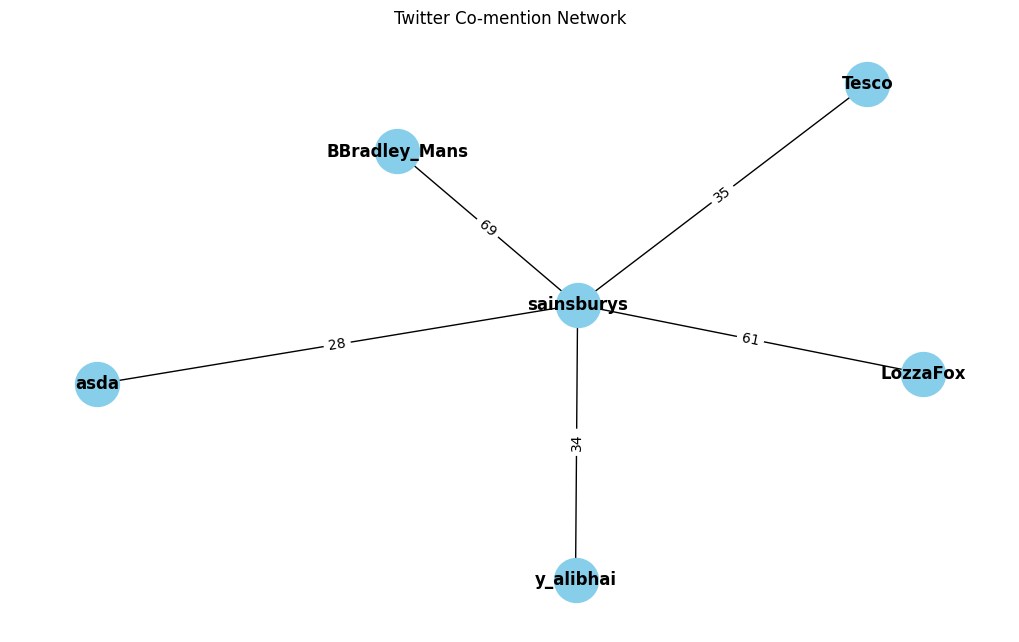

In [123]:
G = nx.Graph()

# Add edges to the graph with weights
for _, row in mention_df.iterrows():
    G.add_edge(row['user1'], row['user2'], weight=row['mention'])

# Plot the co-mention network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')

# Draw edge labels (weights)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Twitter Co-mention Network')
plt.show()

In [124]:
sains_df_final['hashtags'] = [parse_json(x)['hashtags'] for x in sains_df_final['entities']]
hashtag_df = sains_df_final[[len(x)>0 for x in sains_df_final['hashtags']]]
hashtag_df['hashtags_text'] = [[y['text'] for y in x] for x in hashtag_df['hashtags']]
hashtag_df = hashtag_df[[len(x)>1 for x in hashtag_df['hashtags_text']]]
hashtag_df = hashtag_df[['hashtags_text']]
hashtag_df['hashtag_pair'] = [list(itertools.combinations(x,2)) for x in hashtag_df['hashtags_text']]
hashtag_df = hashtag_df[['hashtag_pair']].explode('hashtag_pair')
hashtag_df['hashtag1'] = [x[0] for x in hashtag_df['hashtag_pair']]
hashtag_df['hashtag2'] = [x[1] for x in hashtag_df['hashtag_pair']]
hashtag_df = hashtag_df.drop(columns=['hashtag_pair'])
hashtag_df['hashtag']=1
hashtag_df = hashtag_df.groupby(by=['hashtag1','hashtag2'])['hashtag'].count().reset_index()

hashtag_df = hashtag_df.sort_values(by='hashtag', ascending=False).reset_index()
hashtag_df = hashtag_df.head(5)

hashtag_df['interaction'] = [sorted([x,y]) for x,y in zip(hashtag_df['hashtag1'],hashtag_df['hashtag2'])]
hashtag_df['interaction_str'] = hashtag_df['interaction'].apply(str)
hashtag_df = hashtag_df.groupby(by=['interaction_str'])['hashtag'].sum().reset_index()
hashtag_df['hashtag1'] = [ast.literal_eval(x)[0] for x in hashtag_df['interaction_str']]
hashtag_df['hashtag2'] = [ast.literal_eval(x)[1] for x in hashtag_df['interaction_str']]

hashtag_df.head()

interaction_str  hashtag           hashtag1  \
0   ['BlackHistoryMonth', 'BlackLivesMatter']        5  BlackHistoryMonth   
1         ['BlackHistoryMonth', 'Sainsburys']        6  BlackHistoryMonth   
2  ['BoycottSainsburys', 'BoycottSainsburys']        6  BoycottSainsburys   
3             ['LoveitOrHateit', 'halloween']        7     LoveitOrHateit   
4          ['Sainsburys', 'sainsburysadvert']        8         Sainsburys   

            hashtag2  
0   BlackLivesMatter  
1         Sainsburys  
2  BoycottSainsburys  
3          halloween  
4   sainsburysadvert

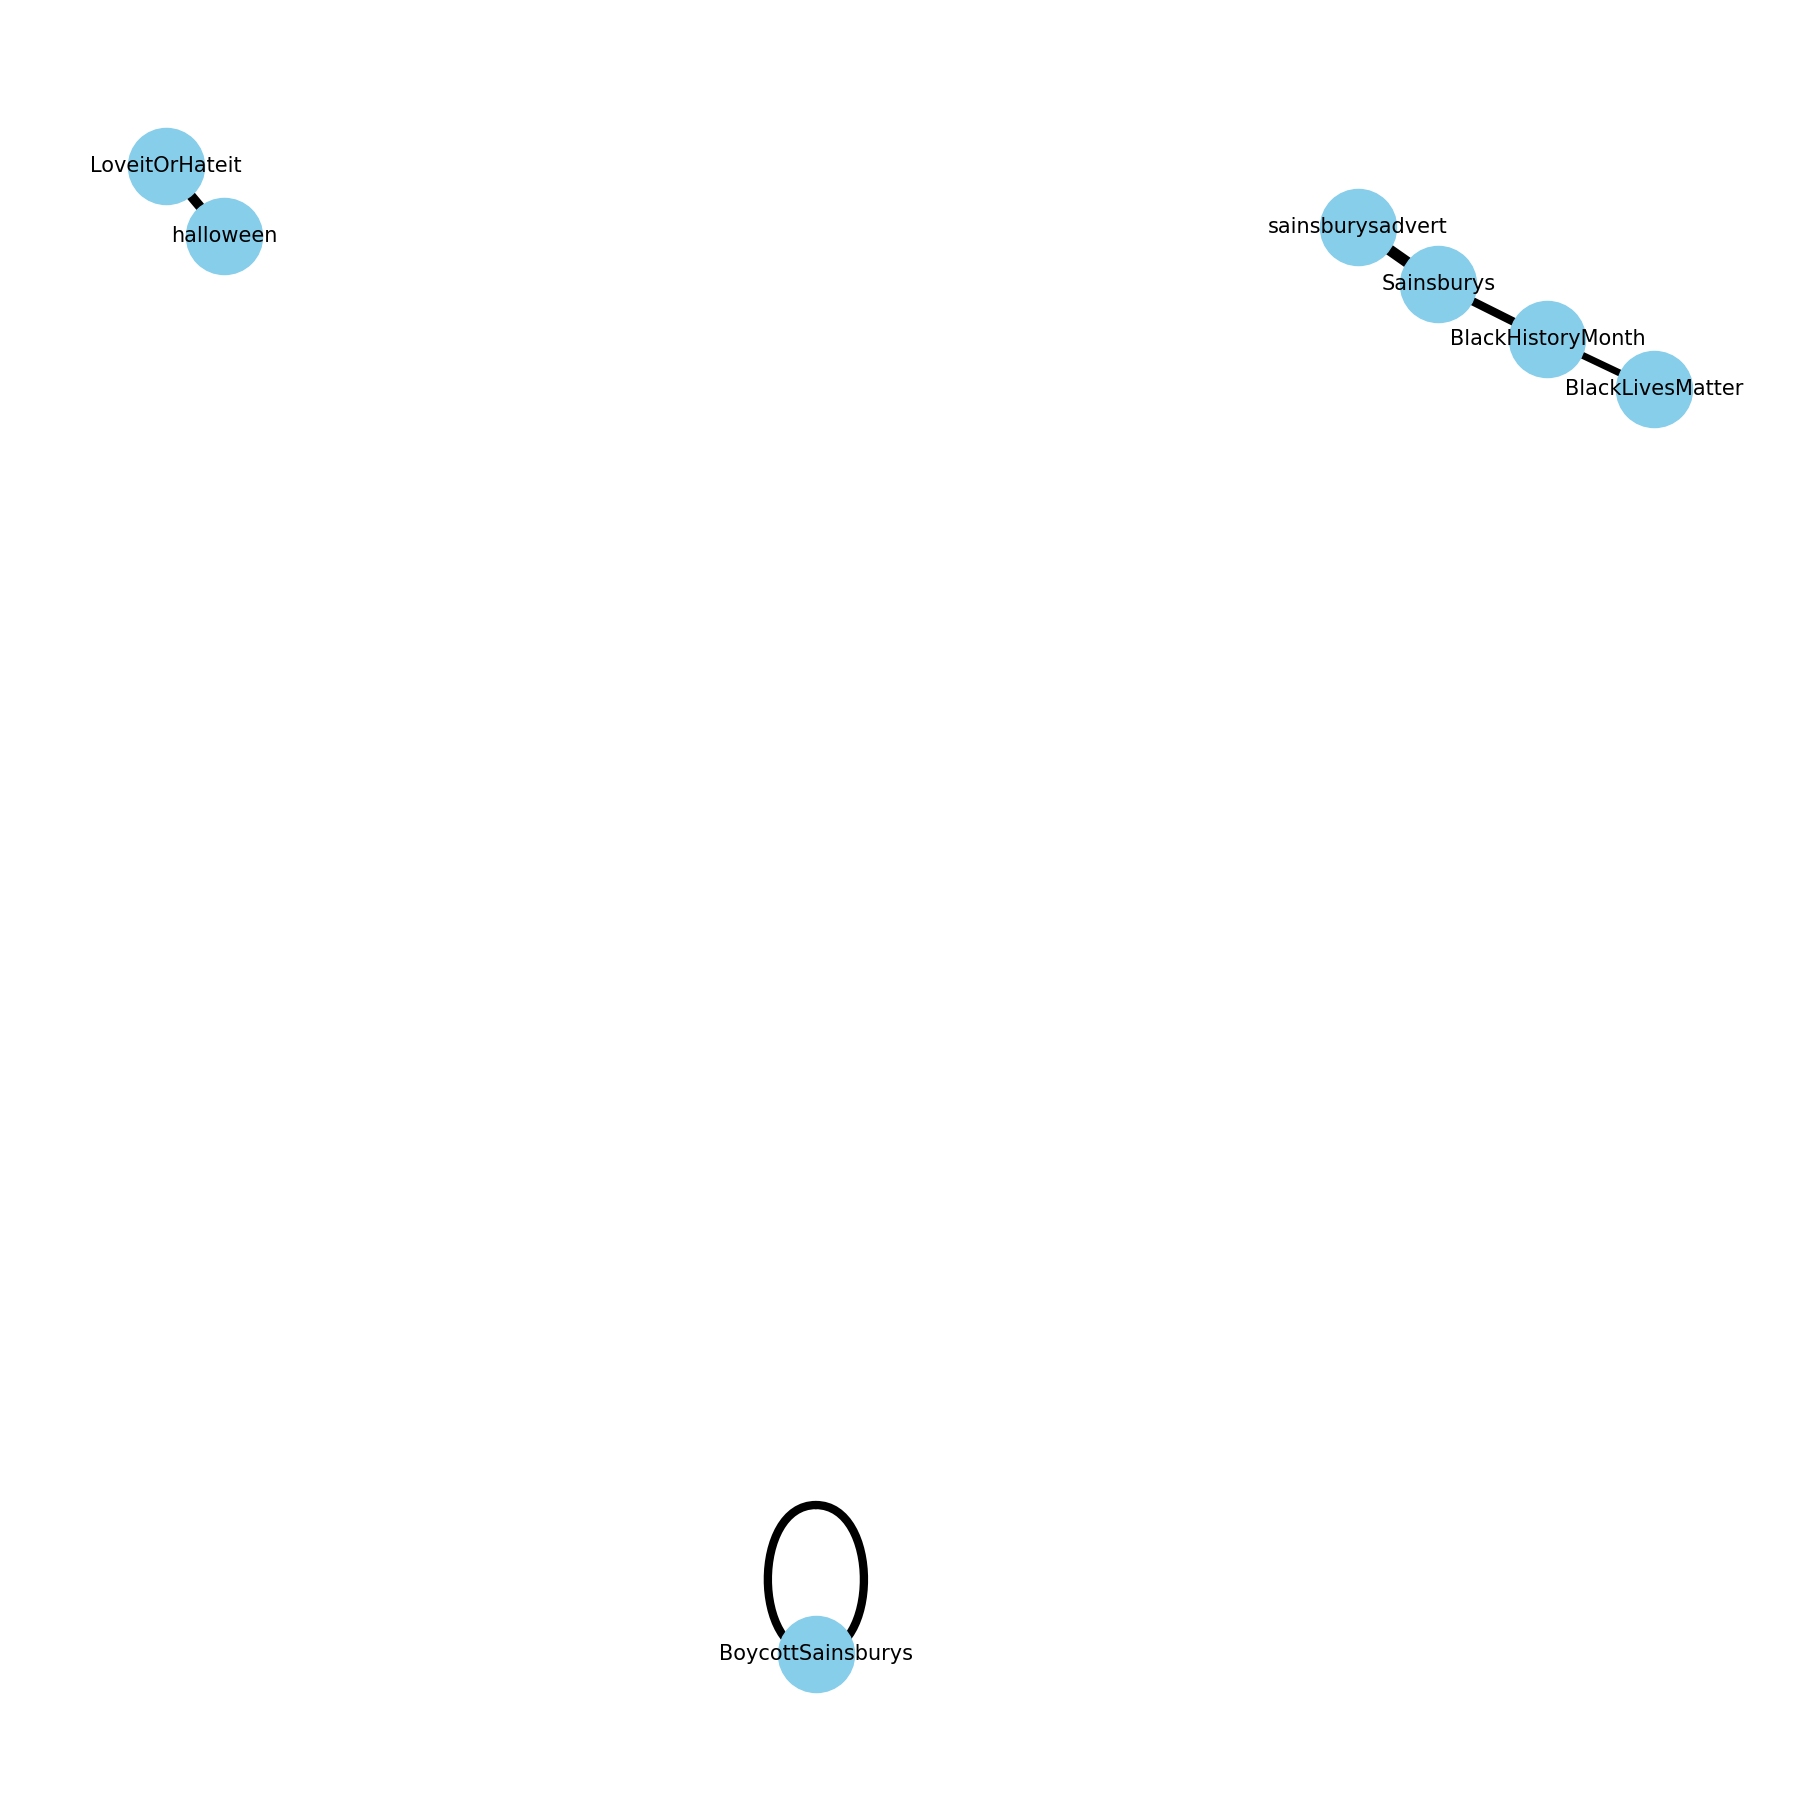

In [166]:
import networkx as nx
import matplotlib.pyplot as plt


# Set basic parameters
G_from_df = nx.from_pandas_edgelist(hashtag_df, 'hashtag1', 'hashtag2', ['hashtag'])

for _, row in hashtag_df.iterrows():
    G_from_df.add_edge(row['hashtag1'], row['hashtag2'], weight=row['hashtag'])
    
# Position nodes using the spring layout
pos_from_df = nx.spring_layout(G_from_df)

edge_widths = [d['hashtag'] for (u, v, d) in G_from_df.edges(data=True)]
# Basic network plot with node labels
plt.figure(figsize=(18, 18))
nx.draw(G_from_df, pos=pos_from_df, with_labels=True, width=edge_widths, node_color='skyblue', node_size=3000, edge_color='k', linewidths=1, font_size=15, arrows=True)

# Display the plot
plt.show()


In [126]:
user_undnet_df[['user1', 'user2']].values

array([['ChrisPDuck', 'Tesco'],
       ['HaynesGreyhound', 'Paul_Horses1st'],
       ['lucius_vorenus', 'spendinio'],
       ['333peterobinson', 'HaynesGreyhound'],
       ['LeeG15', 'plastic_doll__']], dtype=object)

In [127]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform 

sains_reply_analysis = sains_df_final[['user_screen_name','in_reply_to_screen_name']].dropna()
sains_reply_analysis.columns = ['user1', 'user2']

sains_reply_analysis['reply'] = 1
sains_reply_analysis = sains_reply_analysis[sains_reply_analysis['user1'] != sains_reply_analysis['user2']]

sains_reply_analysis['interaction'] = [sorted([x,y]) for x,y in zip(sains_reply_analysis['user1'],sains_reply_analysis['user2'])]
sains_reply_analysis['interaction_str'] = sains_reply_analysis['interaction'].apply(str)

user_undnet_df = sains_reply_analysis.groupby(by=['interaction_str'])['reply'].sum().reset_index()

user_undnet_df['user1'] = [ast.literal_eval(x)[0] for x in user_undnet_df['interaction_str']]
user_undnet_df['user2'] = [ast.literal_eval(x)[1] for x in user_undnet_df['interaction_str']]
user_undnet_df = user_undnet_df.sort_values(by='reply', ascending=False).head(20).reset_index()
user_undnet_df

index                         interaction_str  reply            user1  \
0    2576                 ['ChrisPDuck', 'Tesco']     19       ChrisPDuck   
1    5032   ['HaynesGreyhound', 'Paul_Horses1st']     17  HaynesGreyhound   
2   14899         ['lucius_vorenus', 'spendinio']     17   lucius_vorenus   
3     141  ['333peterobinson', 'HaynesGreyhound']     14  333peterobinson   
4    6975            ['LeeG15', 'plastic_doll__']     13           LeeG15   
5    5034       ['HaynesGreyhound', 'beanie1503']     13  HaynesGreyhound   
6    6908          ['LattMaurillard', 'dadof315']     12   LattMaurillard   
7   10534     ['SoupTomatoSoup', 'northumbrian_']     12   SoupTomatoSoup   
8   10969          ['TeddyPendergraz', 'cpd9991']     11  TeddyPendergraz   
9    6365       ['JustineLaurenc5', 'sainsburys']     11  JustineLaurenc5   
10   9252         ['Paul_Horses1st', 'epsom1818']     11   Paul_Horses1st   
11   5175          ['Holdstk', 'LeslieS38516391']     10          Holdstk   
12  12884  ['cincusnaveurn21', 'leon_comissiong']     10  cincusnaveurn21   
13   2514          ['ChitChat5', 'NelsonMuntzOK']      9        ChitChat5   
14   2363            ['CeejSays', 'Compadre1224']      9         CeejSays   
15   1166             ['Aston365', 'Mongrelbite']      9         Aston365   
16   9251          ['Paul_Horses1st', 'dave2482']      8   Paul_Horses1st   
17   1208            ['AwakenedCelt', 'lukeyook']      8     AwakenedCelt   
18     26           ['100Dianne', 'Paul16820650']      8        100Dianne   
19  12165          ['andrewdoyle_com', 'winmor1']      8  andrewdoyle_com   

              user2  
0             Tesco  
1    Paul_Horses1st  
2         spendinio  
3   HaynesGreyhound  
4    plastic_doll__  
5        beanie1503  
6          dadof315  
7     northumbrian_  
8           cpd9991  
9        sainsburys  
10        epsom1818  
11  LeslieS38516391  
12  leon_comissiong  
13    NelsonMuntzOK  
14     Compadre1224  
15      Mongrelbite  
16         dave2482  
17         lukeyook  
18     Paul16820650  
19          winmor1

In [128]:
# Degree Centrality (for undirected graphs, use G.to_undirected() or nx.Graph())

G = nx.from_pandas_edgelist(user_undnet_df.head(5), 'user1', 'user2', ['reply'])

degree_centrality = nx.degree_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

igenvector_centrality = nx.to_undirected(G)
# print("Eigenvector Centrality:", eigenvector_centrality)

In [167]:
centrality_df = pd.DataFrame({
    'user': degree_centrality.keys(),
    'degree_centrality': degree_centrality.values(),
    'closeness_centrality': closeness_centrality.values(),
    'betweenness_centrality': betweenness_centrality.values(),
    # 'eigenvector_centrality': eigenvector_centrality.values()
})
centrality_df.round(3)

user  degree_centrality  closeness_centrality  \
0       ChrisPDuck              0.125                 0.125   
1            Tesco              0.125                 0.125   
2  HaynesGreyhound              0.250                 0.250   
3   Paul_Horses1st              0.125                 0.167   
4   lucius_vorenus              0.125                 0.125   
5        spendinio              0.125                 0.125   
6  333peterobinson              0.125                 0.167   
7           LeeG15              0.125                 0.125   
8   plastic_doll__              0.125                 0.125   

   betweenness_centrality  
0                   0.000  
1                   0.000  
2                   0.036  
3                   0.000  
4                   0.000  
5                   0.000  
6                   0.000  
7                   0.000  
8                   0.000

In [130]:
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)

# Convert the edge betweenness centrality dictionary into a DataFrame for better visualization
edge_betweenness_df = pd.DataFrame(list(edge_betweenness_centrality.items()), columns=['edge', 'betweenness_centrality'])

edge_betweenness_df.head()

edge  betweenness_centrality
0                 (ChrisPDuck, Tesco)                0.027778
1   (HaynesGreyhound, Paul_Horses1st)                0.055556
2  (HaynesGreyhound, 333peterobinson)                0.055556
3         (lucius_vorenus, spendinio)                0.027778
4            (LeeG15, plastic_doll__)                0.027778

In [131]:
# Calculate network density
density = nx.density(G)
print(f"Density: {density}")

Density: 0.1388888888888889


In [132]:
# Modularity requires community detection. We'll use the greedy_modularity_communities function for demonstration.
# Note: This function works on undirected graphs, so we'll consider an undirected version of our graph for this part.
G_undirected = G.to_undirected()

from networkx.algorithms.community import greedy_modularity_communities

# Detect communities
communities = list(greedy_modularity_communities(G_undirected))

# Calculate modularity (NetworkX doesn't have a built-in function for this, so we use the community quality module from NetworkX)
modularity = nx.algorithms.community.quality.modularity(G_undirected, communities)
print(f"Modularity: {modularity}")

Modularity: 0.7200000000000001


In [133]:
# Assuming 'linkage' represents the strength of connection, directly use these values
# Create a DataFrame to represent connections as distances
unique_users = pd.unique(user_undnet_df[['user1', 'user2']].values.ravel('K'))
distances = pd.DataFrame(np.zeros((len(unique_users), len(unique_users))), index=unique_users, columns=unique_users)
for index, row in user_undnet_df.iterrows():
    distances.at[row['user1'], row['user2']] = row['reply']
    distances.at[row['user2'], row['user1']] = row['reply']
distances = 1/(distances+1)
distances

ChrisPDuck  HaynesGreyhound  lucius_vorenus  333peterobinson  \
ChrisPDuck             1.00         1.000000        1.000000         1.000000   
HaynesGreyhound        1.00         1.000000        1.000000         0.066667   
lucius_vorenus         1.00         1.000000        1.000000         1.000000   
333peterobinson        1.00         0.066667        1.000000         1.000000   
LeeG15                 1.00         1.000000        1.000000         1.000000   
LattMaurillard         1.00         1.000000        1.000000         1.000000   
SoupTomatoSoup         1.00         1.000000        1.000000         1.000000   
TeddyPendergraz        1.00         1.000000        1.000000         1.000000   
JustineLaurenc5        1.00         1.000000        1.000000         1.000000   
Paul_Horses1st         1.00         0.055556        1.000000         1.000000   
Holdstk                1.00         1.000000        1.000000         1.000000   
cincusnaveurn21        1.00         1.000000        1.000000         1.000000   
ChitChat5              1.00         1.000000        1.000000         1.000000   
CeejSays               1.00         1.000000        1.000000         1.000000   
Aston365               1.00         1.000000        1.000000         1.000000   
AwakenedCelt           1.00         1.000000        1.000000         1.000000   
100Dianne              1.00         1.000000        1.000000         1.000000   
andrewdoyle_com        1.00         1.000000        1.000000         1.000000   
Tesco                  0.05         1.000000        1.000000         1.000000   
spendinio              1.00         1.000000        0.055556         1.000000   
plastic_doll__         1.00         1.000000        1.000000         1.000000   
beanie1503             1.00         0.071429        1.000000         1.000000   
dadof315               1.00         1.000000        1.000000         1.000000   
northumbrian_          1.00         1.000000        1.000000         1.000000   
cpd9991                1.00         1.000000        1.000000         1.000000   
sainsburys             1.00         1.000000        1.000000         1.000000   
epsom1818              1.00         1.000000        1.000000         1.000000   
LeslieS38516391        1.00         1.000000        1.000000         1.000000   
leon_comissiong        1.00         1.000000        1.000000         1.000000   
NelsonMuntzOK          1.00         1.000000        1.000000         1.000000   
Compadre1224           1.00         1.000000        1.000000         1.000000   
Mongrelbite            1.00         1.000000        1.000000         1.000000   
dave2482               1.00         1.000000        1.000000         1.000000   
lukeyook               1.00         1.000000        1.000000         1.000000   
Paul16820650           1.00         1.000000        1.000000         1.000000   
winmor1                1.00         1.000000        1.000000         1.000000   

                   LeeG15  LattMaurillard  SoupTomatoSoup  TeddyPendergraz  \
ChrisPDuck       1.000000        1.000000        1.000000         1.000000   
HaynesGreyhound  1.000000        1.000000        1.000000         1.000000   
lucius_vorenus   1.000000        1.000000        1.000000         1.000000   
333peterobinson  1.000000        1.000000        1.000000         1.000000   
LeeG15           1.000000        1.000000        1.000000         1.000000   
LattMaurillard   1.000000        1.000000        1.000000         1.000000   
SoupTomatoSoup   1.000000        1.000000        1.000000         1.000000   
TeddyPendergraz  1.000000        1.000000        1.000000         1.000000   
JustineLaurenc5  1.000000        1.000000        1.000000         1.000000   
Paul_Horses1st   1.000000        1.000000        1.000000         1.000000   
Holdstk          1.000000        1.000000        1.000000         1.000000   
cincusnaveurn21  1.000000        1.000000        1.000000         1.000000   
ChitC

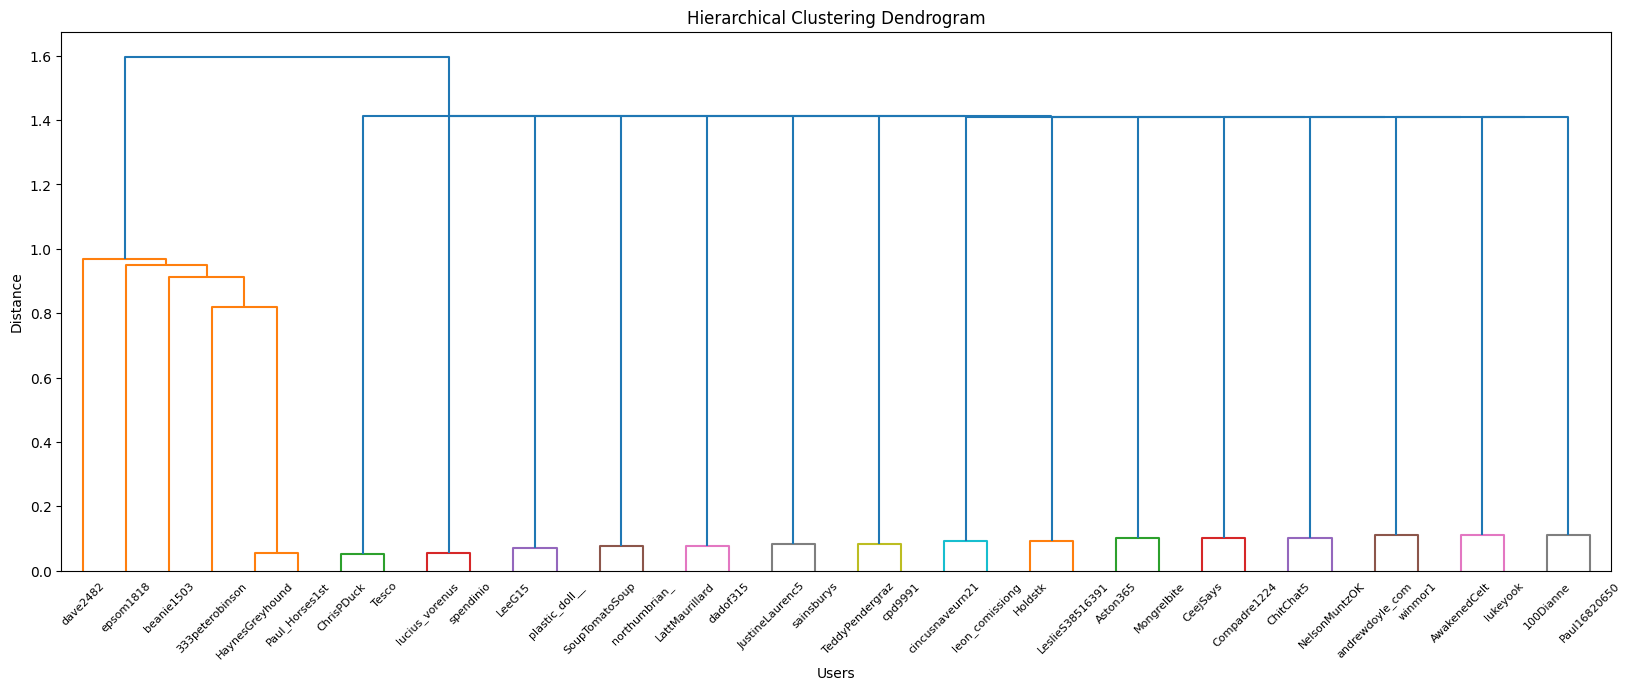

In [134]:
# Convert the DataFrame to a condensed distance matrix
condensed_dist_matrix = squareform(distances, checks=False)
# Perform hierarchical clustering
Z = linkage(condensed_dist_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=unique_users)
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

In [135]:
sains_senti_df = sains_df_final.dropna(subset=['extended_tweet'])

In [136]:
sains_senti_df['full_text'] = [parse_json(x)['full_text'] for x in sains_senti_df['extended_tweet']]

In [137]:
import nltk
import emoji
nltk.download('wordnet') 
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove URLs
def remove_URLs(dataset):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',dataset)
sains_senti_df['full_text'] = sains_senti_df['full_text'].apply(lambda x: remove_URLs(x))

# Remove punctuations
def remove_punctuations(dataset):
    return re.sub(r"[~.,%/:;?_&+*=!-#]"," ",dataset)
sains_senti_df['full_text']= sains_senti_df['full_text'].apply(lambda x: remove_punctuations(x))

# Remove numbers
def remove_numbers(dataset):
    return re.sub('[0-9]+', '', dataset)
sains_senti_df['full_text'] = sains_senti_df['full_text'].apply(lambda x: remove_numbers(x))

# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
sains_senti_df['full_text'] = sains_senti_df['full_text'].apply(lambda text: cleaning_stopwords(text))

# transfer emoji to yext
sains_senti_df['full_text'] = sains_senti_df['full_text'].apply(lambda x: emoji.demojize(x))

def remove_mentions(dataset):
  pattern = r'@\w+'
  return re.sub(pattern," ",dataset)
sains_senti_df['full_text'] = sains_senti_df['full_text'].apply(lambda x: remove_mentions(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
sains_senti_df['full_text'] = sains_senti_df['full_text'].str.lower()
sains_senti_df.head(50)

created_at                   id               id_str  \
4   2020-11-07 20:52:20  1325179302384717824  1325179302384717824   
25  2020-12-19 20:59:59  1340401517396963330  1340401517396963328   
32  2020-11-12 19:52:28  1326976173507817473  1326976173507817472   
35  2020-12-30 10:23:08  1344227515464900608  1344227515464900608   
47  2020-10-25 16:02:49  1320395400709394439  1320395400709394432   
48  2020-10-04 10:03:51  1312694915252584449  1312694915252584448   
66  2020-11-09 11:49:41  1325767514144518146  1325767514144518144   
69  2020-11-08 08:38:53  1325357109752557568  1325357109752557568   
72  2020-11-01 09:20:14  1322830800493154316  1322830800493154304   
76  2020-11-08 06:37:33  1325326573499772929  1325326573499772928   
87  2020-10-08 14:34:21  1314212542604951552  1314212542604951552   
89  2020-12-29 14:16:47  1343923925538004993  1343923925538004992   
92  2020-10-06 00:08:01  1313269746612293633  1313269746612293632   
102 2020-12-17 21:25:06  1339683060741271552  1339683060741271552   
103 2020-10-04 11:58:47  1312723839344934913  1312723839344934912   
136 2020-11-17 06:25:21  1328584995519295488  1328584995519295488   
145 2020-11-18 11:41:35  1329026966633271297  1329026966633271296   
148 2020-11-17 12:53:41  1328682723804917766  1328682723804917760   
151 2020-11-18 22:11:23  1329185459436707841  1329185459436707840   
153 2020-12-22 12:44:35  1341364007211560960  1341364007211560960   
164 2020-11-18 09:13:58  1328989818454421504  1328989818454421504   
172 2020-11-18 14:37:43  1329071290590793733  1329071290590793728   
173 2020-11-17 21:41:58  1328815669190799361  1328815669190799360   
188 2020-10-04 17:58:41  1312814412877750274  1312814412877750272   
193 2020-11-30 08:28:25  1333327007569088515  1333327007569088512   
197 2020-11-17 19:42:37  1328785632227954689  1328785632227954688   
213 2020-10-13 10:37:43  1315964929762045952  1315964929762045952   
224 2020-11-17 10:11:45  1328641971603247106  1328641971603247104   
241 2020-10-04 22:13:52  1312878629869752321  1312878629869752320   
250 2020-11-08 17:24:47  1325489456288329729  1325489456288329728   
253 2020-11-18 13:49:07  1329059062068211712  1329059062068211712   
254 2020-10-18 15:53:25  1317856318431072262  1317856318431072256   
261 2020-10-17 19:28:27  1317548045609947139  1317548045609947136   
262 2020-10-09 11:44:32  1314532194820423680  1314532194820423680   
270 2020-11-17 15:14:26  1328718145486524417  1328718145486524416   
290 2020-10-30 14:17:36  1322180857583599616  1322180857583599616   
296 2020-11-16 20:33:38  1328436085605732353  1328436085605732352   
297 2020-11-17 10:45:14  1328650397188239364  1328650397188239360   
306 2020-11-16 09:06:43  1328263218096201733  1328263218096201728   
316 2020-11-28 22:30:31  1332814152990126083  1332814152990126080   
328 2020-11-07 11:22:10  1325035814955458561  1325035814955458560   
332 2020-10-03 20:49:26  1312494996696645632  1312494996696645632   
363 2020-10-09 20:51:44  1314669901097955328  1314669901097955328   
370 2020-10-05 15:01:10  1313132126410285058  1313132126410285056   
371 2020-10-03 11:59:30  1312361632409038849  1312361632409038848   
377 2020-11-15 13:20:53  1327964791735001088  1327964791735001088   
378 2020-12-03 10:47:47  1334449242795077633  1334449242795077632   
383 2020-10-04 19:03:16  1312830663779909632  1312830663779909632   
384 2020-12-28 22:42:42  1343688854298128386  1343688854298128384   
391 2020-10-19 10:15:19  1318133621459456002  1318133621459456000   

                                                                                                                                                 text  \
4        @lordrix @sainsburys But Sainsbury's have made a 'Big' thing on their website that they will do all they can to hel… https://t.co/veqzpTbpml   
25        @mr_plantgeek @sainsburys That happened to me. I ordered 1 piece and got sent 1kg. Fortunately my sister is a chef… https://t.co/uMQgWkAL8m   
32       @mrdanwalker @AmazonUK @s

In [139]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation

def preprocess(text_to_process):    
    # Preprocess text using custom preprocess functions in the pipeline
    preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation]
    return preprocess_text(text_to_process, preprocess_functions)

sains_senti_df['full_text'] = sains_senti_df['full_text'].apply(preprocess)
sains_senti_df.head(50)

created_at                   id               id_str  \
4   2020-11-07 20:52:20  1325179302384717824  1325179302384717824   
25  2020-12-19 20:59:59  1340401517396963330  1340401517396963328   
32  2020-11-12 19:52:28  1326976173507817473  1326976173507817472   
35  2020-12-30 10:23:08  1344227515464900608  1344227515464900608   
47  2020-10-25 16:02:49  1320395400709394439  1320395400709394432   
48  2020-10-04 10:03:51  1312694915252584449  1312694915252584448   
66  2020-11-09 11:49:41  1325767514144518146  1325767514144518144   
69  2020-11-08 08:38:53  1325357109752557568  1325357109752557568   
72  2020-11-01 09:20:14  1322830800493154316  1322830800493154304   
76  2020-11-08 06:37:33  1325326573499772929  1325326573499772928   
87  2020-10-08 14:34:21  1314212542604951552  1314212542604951552   
89  2020-12-29 14:16:47  1343923925538004993  1343923925538004992   
92  2020-10-06 00:08:01  1313269746612293633  1313269746612293632   
102 2020-12-17 21:25:06  1339683060741271552  1339683060741271552   
103 2020-10-04 11:58:47  1312723839344934913  1312723839344934912   
136 2020-11-17 06:25:21  1328584995519295488  1328584995519295488   
145 2020-11-18 11:41:35  1329026966633271297  1329026966633271296   
148 2020-11-17 12:53:41  1328682723804917766  1328682723804917760   
151 2020-11-18 22:11:23  1329185459436707841  1329185459436707840   
153 2020-12-22 12:44:35  1341364007211560960  1341364007211560960   
164 2020-11-18 09:13:58  1328989818454421504  1328989818454421504   
172 2020-11-18 14:37:43  1329071290590793733  1329071290590793728   
173 2020-11-17 21:41:58  1328815669190799361  1328815669190799360   
188 2020-10-04 17:58:41  1312814412877750274  1312814412877750272   
193 2020-11-30 08:28:25  1333327007569088515  1333327007569088512   
197 2020-11-17 19:42:37  1328785632227954689  1328785632227954688   
213 2020-10-13 10:37:43  1315964929762045952  1315964929762045952   
224 2020-11-17 10:11:45  1328641971603247106  1328641971603247104   
241 2020-10-04 22:13:52  1312878629869752321  1312878629869752320   
250 2020-11-08 17:24:47  1325489456288329729  1325489456288329728   
253 2020-11-18 13:49:07  1329059062068211712  1329059062068211712   
254 2020-10-18 15:53:25  1317856318431072262  1317856318431072256   
261 2020-10-17 19:28:27  1317548045609947139  1317548045609947136   
262 2020-10-09 11:44:32  1314532194820423680  1314532194820423680   
270 2020-11-17 15:14:26  1328718145486524417  1328718145486524416   
290 2020-10-30 14:17:36  1322180857583599616  1322180857583599616   
296 2020-11-16 20:33:38  1328436085605732353  1328436085605732352   
297 2020-11-17 10:45:14  1328650397188239364  1328650397188239360   
306 2020-11-16 09:06:43  1328263218096201733  1328263218096201728   
316 2020-11-28 22:30:31  1332814152990126083  1332814152990126080   
328 2020-11-07 11:22:10  1325035814955458561  1325035814955458560   
332 2020-10-03 20:49:26  1312494996696645632  1312494996696645632   
363 2020-10-09 20:51:44  1314669901097955328  1314669901097955328   
370 2020-10-05 15:01:10  1313132126410285058  1313132126410285056   
371 2020-10-03 11:59:30  1312361632409038849  1312361632409038848   
377 2020-11-15 13:20:53  1327964791735001088  1327964791735001088   
378 2020-12-03 10:47:47  1334449242795077633  1334449242795077632   
383 2020-10-04 19:03:16  1312830663779909632  1312830663779909632   
384 2020-12-28 22:42:42  1343688854298128386  1343688854298128384   
391 2020-10-19 10:15:19  1318133621459456002  1318133621459456000   

                                                                                                                                                 text  \
4        @lordrix @sainsburys But Sainsbury's have made a 'Big' thing on their website that they will do all they can to hel… https://t.co/veqzpTbpml   
25        @mr_plantgeek @sainsburys That happened to me. I ordered 1 piece and got sent 1kg. Fortunately my sister is a chef… https://t.co/uMQgWkAL8m   
32       @mrdanwalker @AmazonUK @s

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from collections import Counter

def bag_of_words_analysis(texts):
    """
    This function performs Bag of Words analysis and plots the top 10 frequent words.
    """
    word_counts = Counter()
    for text in texts:
        word_counts.update(text.split())

    most_common = word_counts.most_common(10)
    words, counts = zip(*most_common)
    plt.figure(figsize=(8, 8))
    # Plotting
    plt.title("Top 10 Most Frequent Words")
    bars = plt.bar(words, counts)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
    plt.show()

    return most_common

def tf_idf_analysis(texts, top_n=15):
    """
    This function performs TF-IDF analysis and plots the top 10 words with highest TF-IDF scores.
    """
   
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_array = np.array(vectorizer.get_feature_names_out())
    
    # Dictionary to keep track of words and their corresponding scores
    max_tfidf_dict = {}
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix.getrow(i)
        for word, score in zip(row.indices, row.data):
            feature_word = feature_array[word]
            max_tfidf_dict[feature_word] = max(max_tfidf_dict.get(feature_word, 0), score)
            
    # Sort words by their score and get top n
    sorted_words = sorted(max_tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:top_n]
    words, scores = zip(*sorted_words)


    
    # Plotting
    plt.figure(figsize=(15, 10))
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.title(f'Top {top_n} Words with Highest TF-IDF Scores')
    plt.xticks(rotation=90)
    bars = plt.bar(words, scores)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
    plt.show()

    return sorted_words

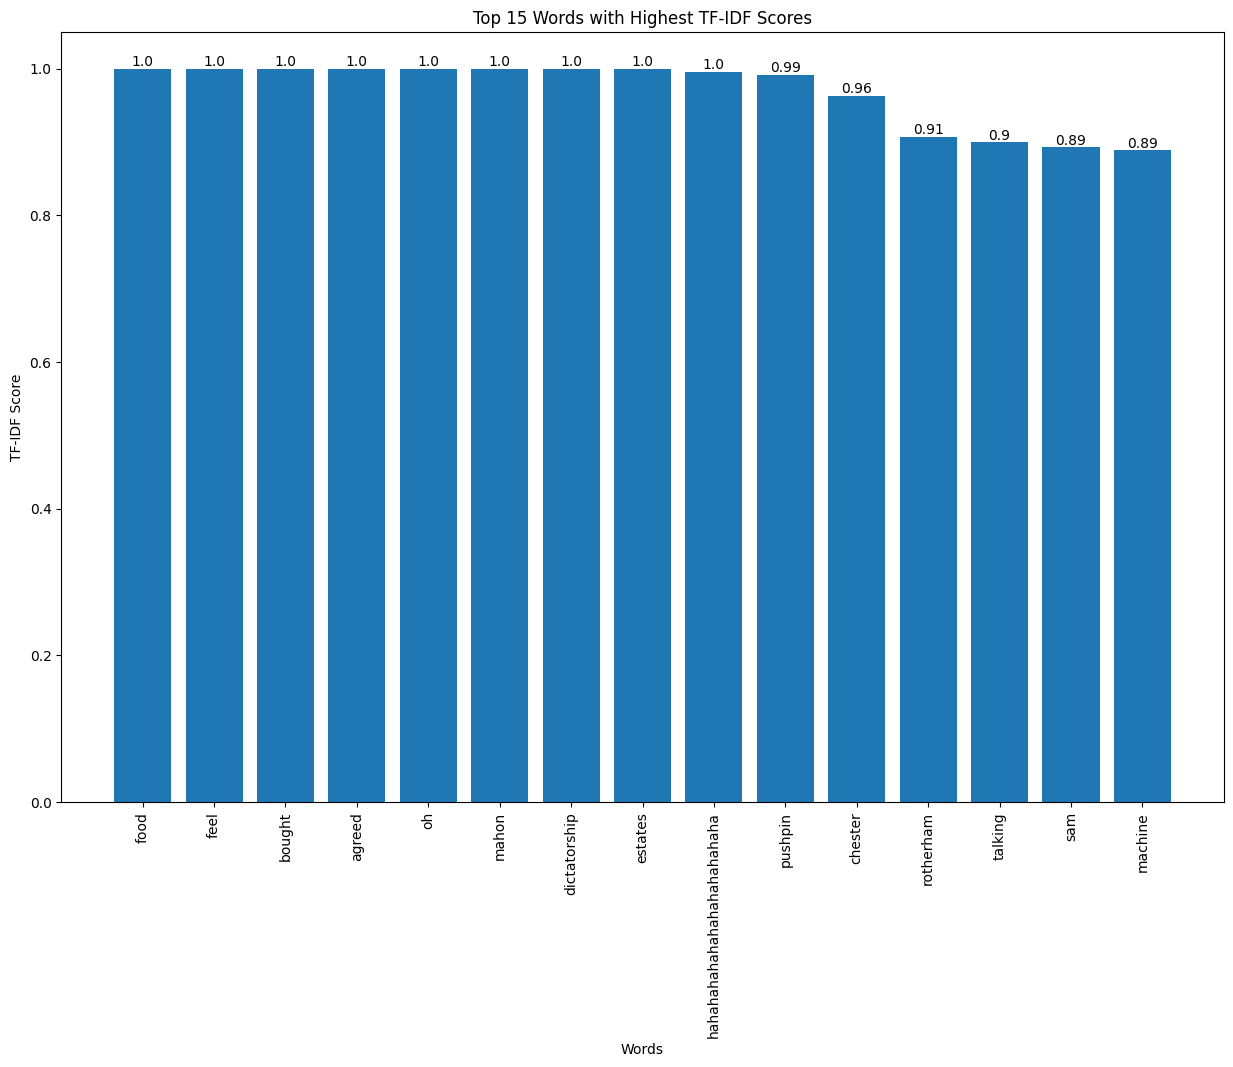

[('food', 1.0),
 ('feel', 1.0),
 ('bought', 1.0),
 ('agreed', 1.0),
 ('oh', 1.0),
 ('mahon', 1.0),
 ('dictatorship', 1.0),
 ('estates', 1.0),
 ('hahahahahahahahahahahahaha', 0.9955290632921251),
 ('pushpin', 0.9913238768868777),
 ('chester', 0.9629703133366825),
 ('rotherham', 0.9066906960839332),
 ('talking', 0.8992356344552832),
 ('sam', 0.8925020587057491),
 ('machine', 0.8884735072881943)]

In [141]:
corpus = list(sains_senti_df['full_text'])
corpus = [x.strip() for x in corpus]
tf_idf_analysis(corpus)

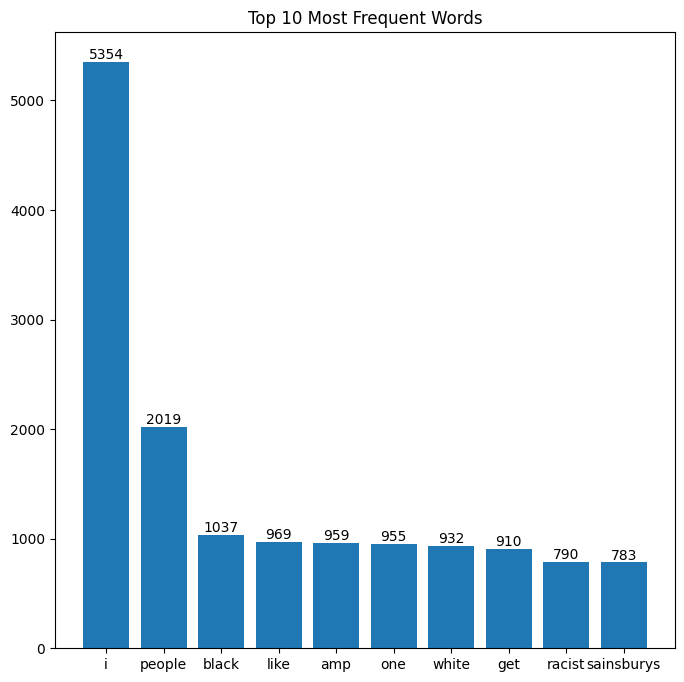

[('i', 5354),
 ('people', 2019),
 ('black', 1037),
 ('like', 969),
 ('amp', 959),
 ('one', 955),
 ('white', 932),
 ('get', 910),
 ('racist', 790),
 ('sainsburys', 783)]

In [142]:
bag_of_words_analysis(corpus)

In [143]:
sains_senti_df['full_text']=sains_senti_df['full_text'].apply(lambda x: np.NaN if str(x).isspace() else x)
sains_senti_df = sains_senti_df[~sains_senti_df['full_text'].isnull()]

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
sains_senti_df = sains_senti_df.reset_index()
sains_senti_df['full_text'] = sains_senti_df['full_text'].apply(lambda x: lemmatizer_on_text(x))


In [144]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('opinion_lexicon')
positive_wds = set(opinion_lexicon.positive())
negative_wds = set(opinion_lexicon.negative())


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [145]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sains_senti_df['rating'] = sains_senti_df['full_text'].apply(sia.polarity_scores)

get_value = lambda d: d['compound']
sains_senti_df["sentiment_score"] = sains_senti_df["rating"].apply(get_value)

def sentiment_classifier(dataset):
  if dataset["sentiment_score"] >= 0.2:
    return 'positive'
  if dataset["sentiment_score"] <= -0.2:
    return 'negative'
  return 'neutral'

sains_senti_df["sentiment"]=sains_senti_df.apply(sentiment_classifier, axis=1)

sains_senti_df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


index          created_at                   id               id_str  \
0      4 2020-11-07 20:52:20  1325179302384717824  1325179302384717824   
1     25 2020-12-19 20:59:59  1340401517396963330  1340401517396963328   
2     32 2020-11-12 19:52:28  1326976173507817473  1326976173507817472   
3     35 2020-12-30 10:23:08  1344227515464900608  1344227515464900608   
4     47 2020-10-25 16:02:49  1320395400709394439  1320395400709394432   

                                                                                                                                           text  \
0  @lordrix @sainsburys But Sainsbury's have made a 'Big' thing on their website that they will do all they can to hel… https://t.co/veqzpTbpml   
1   @mr_plantgeek @sainsburys That happened to me. I ordered 1 piece and got sent 1kg. Fortunately my sister is a chef… https://t.co/uMQgWkAL8m   
2  @mrdanwalker @AmazonUK @sainsburys @asda I tried taking my life two months ago, and nothing goes through your mind,… https://t.co/uKvuDMWkCi   
3  @sainsburys Reported an item missing from my delivery this morning via ‘Contact us’ Twitter option. Haven’t had a r… https://t.co/BZW9QSNEvu   
4  Advisor on the phone @sainsburys told me I should have returned these items to the STORE to get a refund. They were… https://t.co/Dzje5HU3Rg   

  display_text_range  \
0          [21, 140]   
1          [26, 140]   
2          [41, 140]   
3               None   
4           [0, 140]   

                                                                                 source  \
0  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   

   truncated  in_reply_to_status_id  in_reply_to_status_id_str  ...  \
0       True           1.325169e+18               1.325169e+18  ...   
1       True           1.340383e+18               1.340383e+18  ...   
2       True           1.326952e+18               1.326952e+18  ...   
3       True                    NaN                        NaN  ...   
4       True                    NaN                        NaN  ...   

           name                date user_screen_name  \
0     P Cornish 2020-11-07 20:52:20        PCornish5   
1       Linda G 2020-12-19 20:59:59        HogsFrogs   
2        Lynsey 2020-11-12 19:52:28   Lynsey70548610   
3          Kate 2020-12-30 10:23:08     KateCoulling   
4  Deb McKinney 2020-10-25 16:02:49         Debzee36   

                                                                                                                                            user_profile  \
0  Family man, luckily married to the most wonderful lady with whom I share two fantastic grown up children, both doing rather better than their Father!   
1                                                                               Birder, wildlife lover and wildlife rescue volunteer at @FollyWildlifeUK   
2                                                                                                                                       single and ready   
3                                                                                                                                                   None   
4                                                                                                                                                   None   

                    user_geo hashtags  \
0                       None       []   
1                   Kent, UK       []   
2                       None       []   
3                       None       []   
4  Belfast, Northern Ireland       []   

                                   

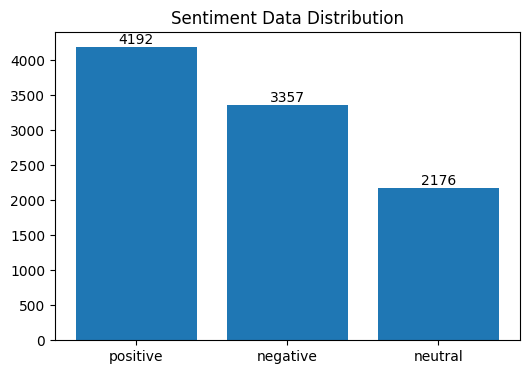

In [146]:
val=sains_senti_df['sentiment'].value_counts()

x=val.index
y=val.values
plt.figure(figsize=(6,4))
bars = plt.bar(x, y)
plt.title("Sentiment Data Distribution")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

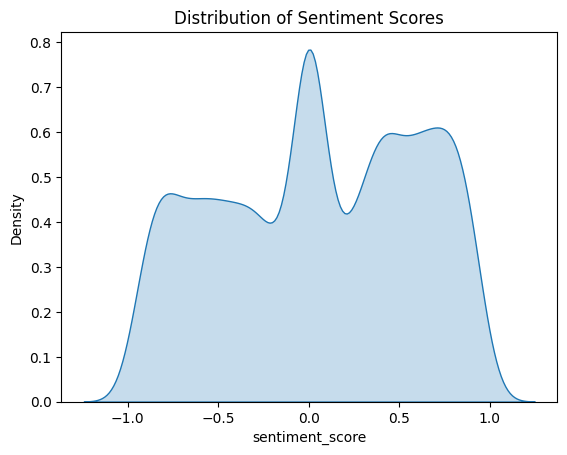

In [147]:
import seaborn as sns

sns.kdeplot(data=sains_senti_df, x='sentiment_score', label='sentiment_score', fill=True)
plt.title("Distribution of Sentiment Scores")
plt.show()

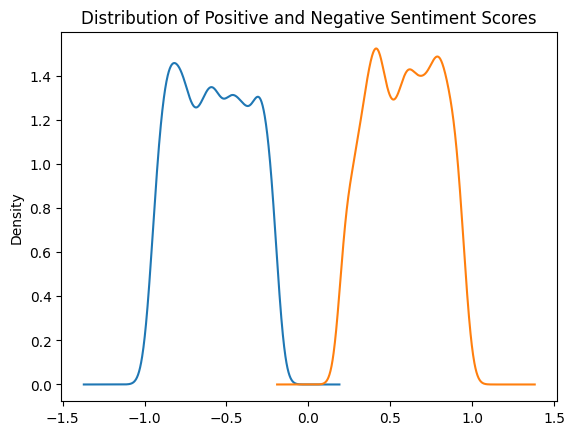

In [148]:
sains_senti_df[sains_senti_df.sentiment=="negative"]['sentiment_score'].plot.kde();
sains_senti_df[sains_senti_df.sentiment=="positive"]['sentiment_score'].plot.kde();
plt.title("Distribution of Positive and Negative Sentiment Scores")
plt.show()

In [149]:
sains_senti_df[sains_senti_df.sentiment == 'Positive']

Empty DataFrame
Columns: [index, created_at, id, id_str, text, display_text_range, source, truncated, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, quote_count, reply_count, retweet_count, favorite_count, entities, favorited, retweeted, filter_level, lang, matching_rules, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, quoted_status_permalink, extended_tweet, possibly_sensitive, extended_entities, scopes, parsed_user, name, date, user_screen_name, user_profile, user_geo, hashtags, full_text, rating, sentiment_score, sentiment]
Index: []

[0 rows x 49 columns]

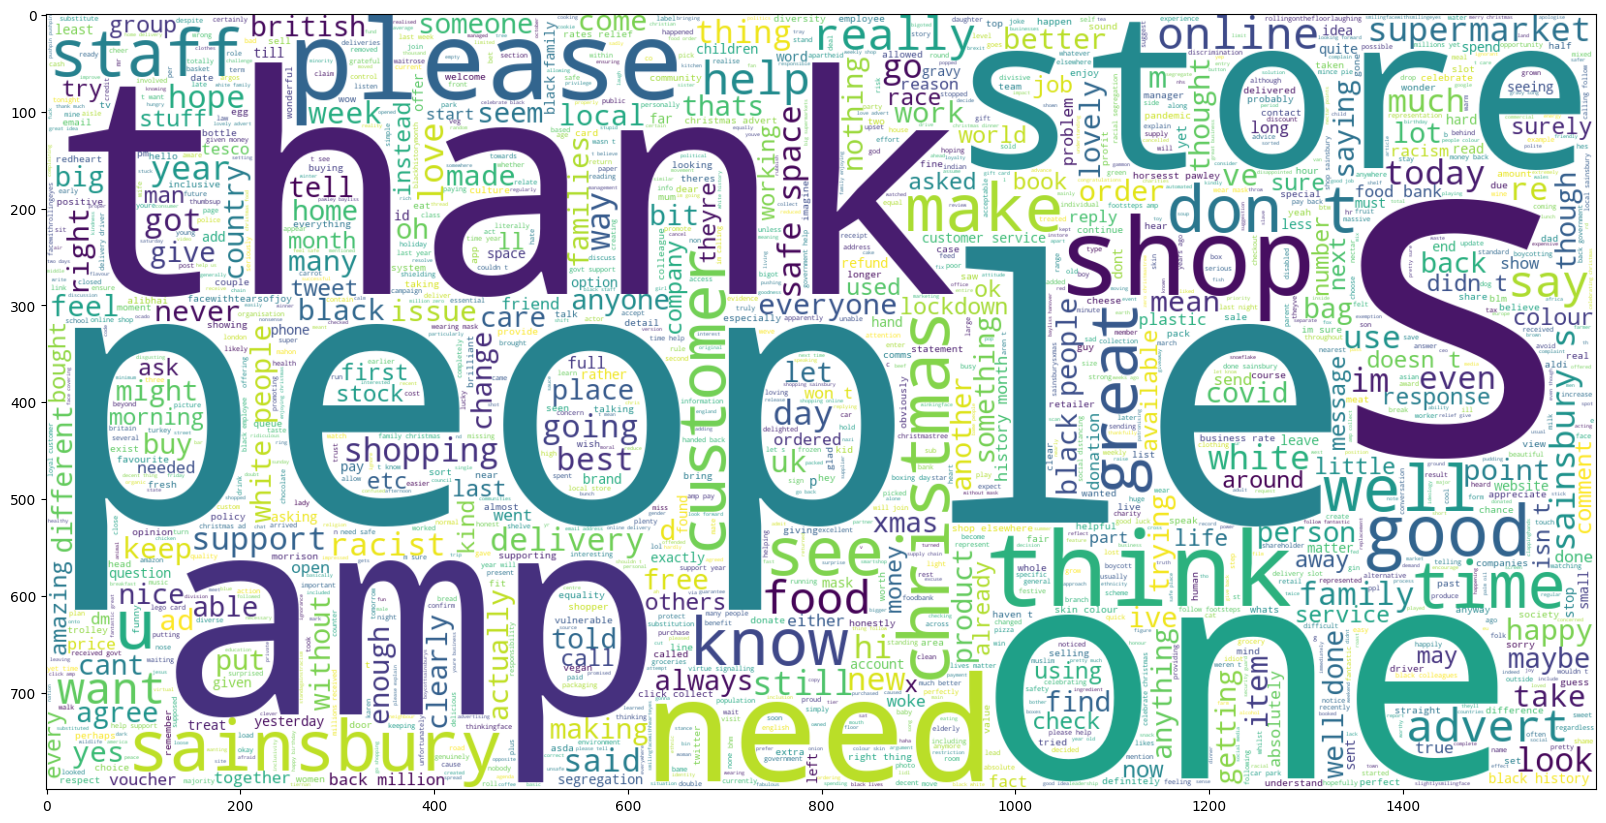

In [150]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sains_senti_df[sains_senti_df.sentiment == 'positive'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

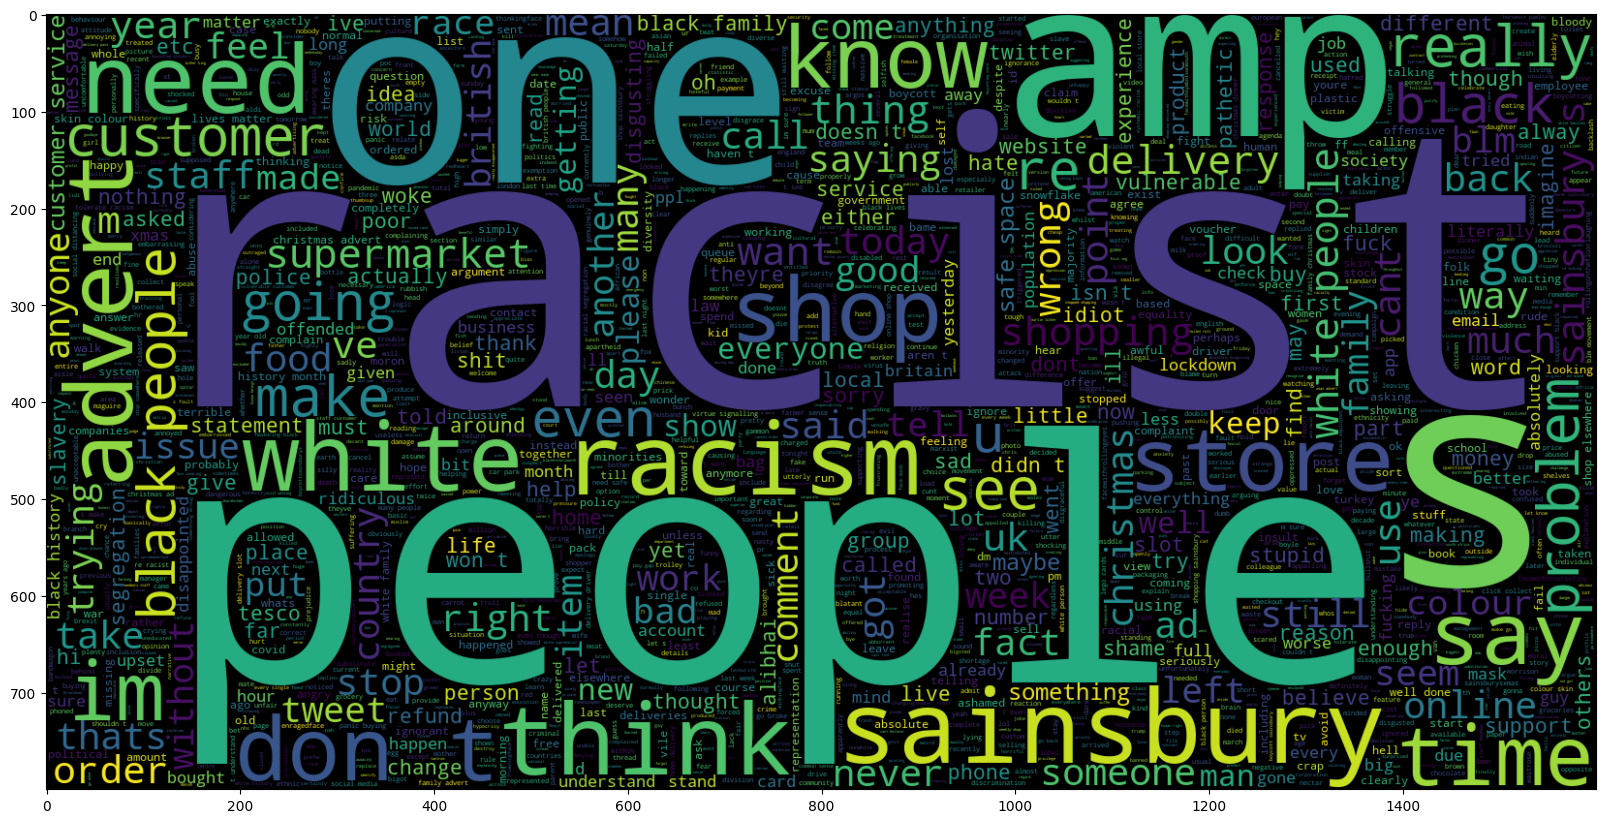

In [151]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sains_senti_df[sains_senti_df.sentiment == 'negative'].full_text))
plt.imshow(wc , interpolation = 'bilinear')

In [152]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Training Accuracy : 0.998237108858528
Test Accuracy : 0.5222755311857437


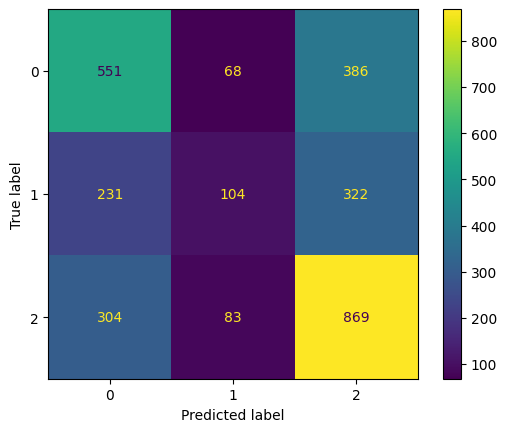

In [153]:
# Separating the 70% data for training data and 30% for testing data
# from sklearn.model_selection  import train_test_split
trainsize = 0.7
X = sains_senti_df['full_text']
y = sains_senti_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123) # Splits Dataset into Training and Testing set
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy : 0.9988247392390187
Test Accuracy : 0.5130226182316655
[[ 382   17  606]
 [ 126   70  461]
 [ 182   29 1045]]


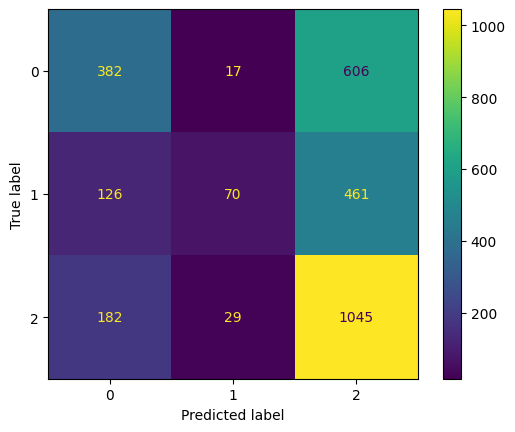

In [154]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [155]:
# Use pretrained model
# !pip install transformers torch
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name, from_tf=True)
model = RobertaForSequenceClassification.from_pretrained(model_name, from_tf=True)

def sentiment_score(review_text):
    # Encode the text
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # Forward pass, get logits
    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    return scores



All TF 2.0 model weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.


In [156]:
for tweet in corpus[:100]:
    scores = sentiment_score(tweet)
    print(f'Tweet: "{tweet}"')
    print(f'Scores: {scores}')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Tweet: "but sainsburys made big thing website help vulnerable including telephone line pcs especially tech savvy place order i teresting see works"
Scores: [0.01341679 0.28931424 0.69726896]
Tweet: "plantgeek   that happened i ordered piece got sent kg fortunately sister chef able use it freezes well grates easily frozen way"
Scores: [0.01291899 0.42764738 0.55943364]
Tweet: "i tried taking life two months ago nothing goes mind family mr speeds boys need someone walked shoes talk give phone number"
Scores: [0.53518546 0.44681644 0.01799802]
Tweet: "reported item missing delivery morning via ‘contact us’ twitter option haven’t response could advise please"
Scores: [0.73589814 0.24879251 0.01530933]
Tweet: "advisor phone   told i returned items store get refund they date within days including day delivery return to store what in middle pandemic wyse up"
Scores: [0.27061304 0.68252724 0.04685969]
Tweet: "absolutely must support small businesses support others we must not not support total

In [157]:
lda_sains_data = sains_senti_df

In [158]:
import unicodedata
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [159]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
        if word!='':
           words.append(word)
    return words

lda_sains_data['tokens']=lda_sains_data.full_text.apply(generate_tokens)
lda_sains_data.head()

index          created_at                   id               id_str  \
0      4 2020-11-07 20:52:20  1325179302384717824  1325179302384717824   
1     25 2020-12-19 20:59:59  1340401517396963330  1340401517396963328   
2     32 2020-11-12 19:52:28  1326976173507817473  1326976173507817472   
3     35 2020-12-30 10:23:08  1344227515464900608  1344227515464900608   
4     47 2020-10-25 16:02:49  1320395400709394439  1320395400709394432   

                                                                                                                                           text  \
0  @lordrix @sainsburys But Sainsbury's have made a 'Big' thing on their website that they will do all they can to hel… https://t.co/veqzpTbpml   
1   @mr_plantgeek @sainsburys That happened to me. I ordered 1 piece and got sent 1kg. Fortunately my sister is a chef… https://t.co/uMQgWkAL8m   
2  @mrdanwalker @AmazonUK @sainsburys @asda I tried taking my life two months ago, and nothing goes through your mind,… https://t.co/uKvuDMWkCi   
3  @sainsburys Reported an item missing from my delivery this morning via ‘Contact us’ Twitter option. Haven’t had a r… https://t.co/BZW9QSNEvu   
4  Advisor on the phone @sainsburys told me I should have returned these items to the STORE to get a refund. They were… https://t.co/Dzje5HU3Rg   

  display_text_range  \
0          [21, 140]   
1          [26, 140]   
2          [41, 140]   
3               None   
4           [0, 140]   

                                                                                 source  \
0  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   

   truncated  in_reply_to_status_id  in_reply_to_status_id_str  ...  \
0       True           1.325169e+18               1.325169e+18  ...   
1       True           1.340383e+18               1.340383e+18  ...   
2       True           1.326952e+18               1.326952e+18  ...   
3       True                    NaN                        NaN  ...   
4       True                    NaN                        NaN  ...   

                 date  user_screen_name  \
0 2020-11-07 20:52:20         PCornish5   
1 2020-12-19 20:59:59         HogsFrogs   
2 2020-11-12 19:52:28    Lynsey70548610   
3 2020-12-30 10:23:08      KateCoulling   
4 2020-10-25 16:02:49          Debzee36   

                                                                                                                                            user_profile  \
0  Family man, luckily married to the most wonderful lady with whom I share two fantastic grown up children, both doing rather better than their Father!   
1                                                                               Birder, wildlife lover and wildlife rescue volunteer at @FollyWildlifeUK   
2                                                                                                                                       single and ready   
3                                                                                                                                                   None   
4                                                                                                                                                   None   

                    user_geo hashtags  \
0                       None       []   
1                   Kent, UK       []   
2                       None       []   
3                       None       []   
4  Belfast, Northern Ireland       []   

                                                                                                                 

In [160]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(lda_sains_data['tokens'])

def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus

corpus=create_document_matrix(lda_sains_data['tokens'],id2word)

In [161]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                             )

In [162]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.012968  0.025301       1        1  17.808417
2      0.009041 -0.145985       2        1  13.212266
8     -0.097619 -0.038391       3        1  12.300474
7     -0.093736  0.125675       4        1  10.713960
1      0.123538 -0.145211       5        1   8.774424
3      0.177418 -0.022854       6        1   8.488563
6      0.040457  0.210229       7        1   8.130793
4     -0.116384 -0.163579       8        1   7.770010
0     -0.218850  0.048451       9        1   6.606133
5      0.163166  0.106364      10        1   6.194962, topic_info=           Term         Freq        Total Category  logprob  loglift
519       white   930.000000   930.000000  Default  30.0000  30.0000
98          amp   942.000000   942.000000  Default  29.0000  29.0000
4             i  5540.000000  5540.000000  Default  28.0000  28.0000
370       black  1035.000000  1035.000000  Default  27.0000  27.0000
284      people  2015.000000  2015.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
223      racist    37.418308   783.815963  Topic10  -5.7354  -0.2606
11   sainsburys    35.972717   788.444632  Topic10  -5.7748  -0.3059
343          uk    32.928153   339.549015  Topic10  -5.8633   0.4481
370       black    33.803470  1035.148383  Topic10  -5.8370  -0.6403
13          see    33.295251   575.098614  Topic10  -5.8522  -0.0677

[822 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
21        1  0.093432    able
21        2  0.014374    able
21        3  0.215612    able
21        4  0.079058    able
21        5  0.107806    able
...     ...       ...     ...
7279      4  0.931771   ‘safe
2846      7  0.969890      ’s
5643      8  0.922579  “white
6556      8  0.034606       ⁠
6556      9  0.934359       ⁠

[2508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 9, 8, 2, 4, 7, 5, 1, 6])